In [74]:
import tqdm
import csv
counter = -1
with open('C:/Users/valer/Desktop/Stage_Notebook/automatic-ecg-diagnosis-master/data/gold_standard.csv','r', newline='') as csvfile:
        COUNTER = 0
        i = 1
        carac = {"np":[],"1dAVB":[],"RBBB":[],"LBBB":[],"SB":[],"AF":[],"ST":[]}
        indexes = list(carac.keys())

        f = csv.reader(csvfile)
        for line in f:
            if "1" in line and line.count("1") == 1 : #Just taking the "mono-disease" ECG to analyse

                carac[indexes[line.index("1")+1]].append(i)
            elif len(carac["np"]) < 2000:
                carac["np"].append(i)
                


            i+=1

In [75]:
print(carac["LBBB"])


[3, 30, 60, 101, 106, 143, 187, 219, 253, 255, 281, 295, 304, 343, 347, 355, 384, 386, 495, 500, 536, 576, 586, 596, 789]


In [55]:
print(carac["RBBB"])

[68, 107, 242, 256, 290, 299, 314, 331, 343, 366]


In [40]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

with h5py.File("automatic-ecg-diagnosis-master/data/ecg_tracings.hdf5", "r") as f:
    x = np.array(f['tracings'])

print(np.transpose(x).shape)
print(np.transpose(x[13]).shape)



(12, 4096, 827)
(12, 4096)


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

(12, 4000)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)
(12, 4096)
(12, 4000)


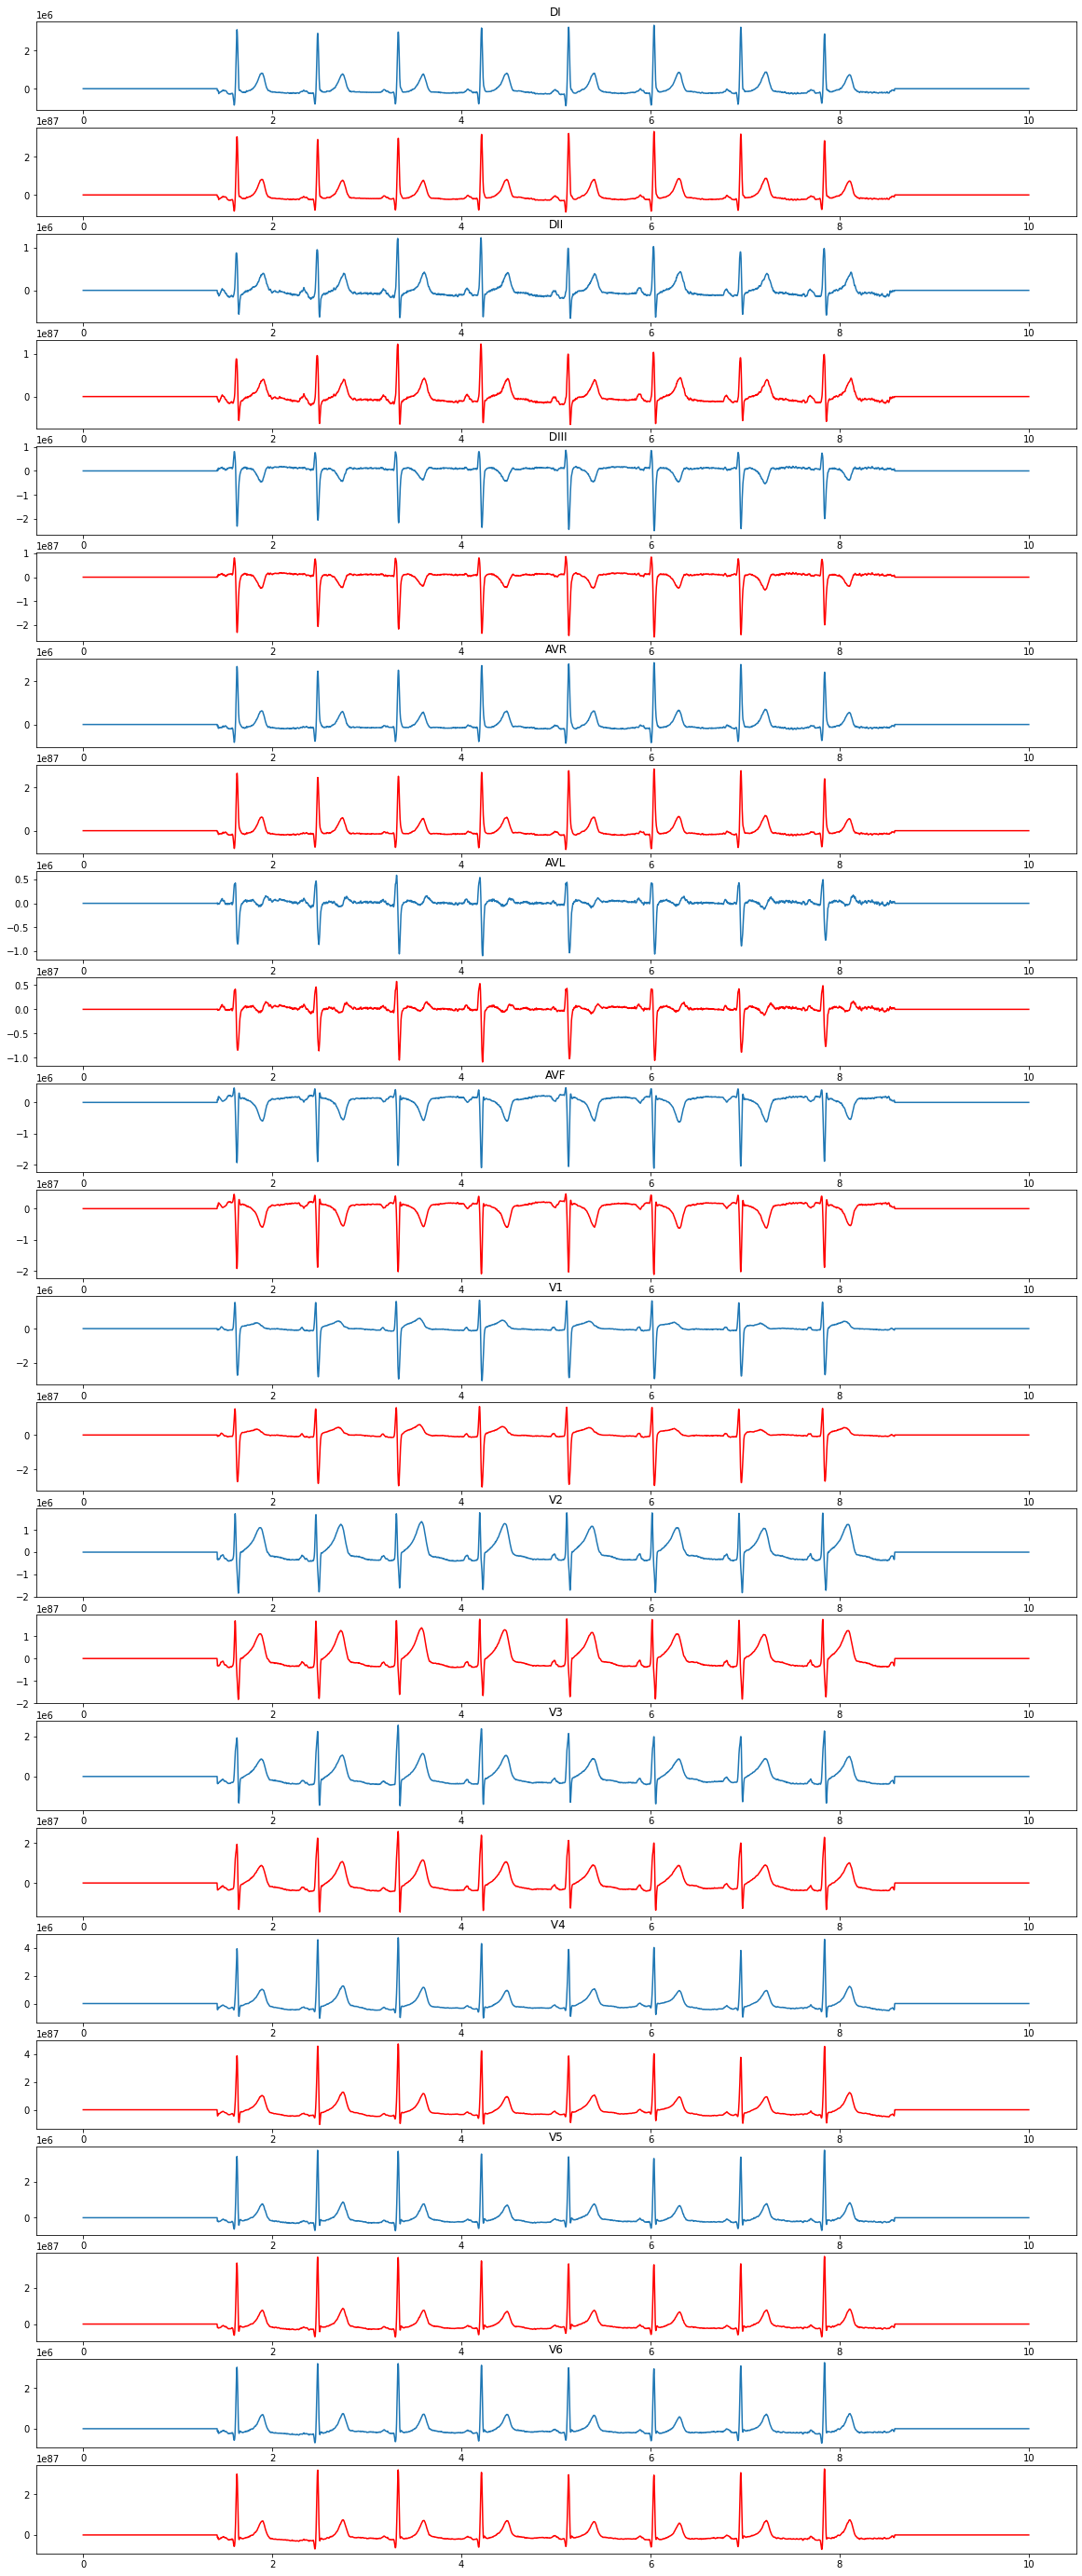

In [42]:
import numpy as np
import cv2
from tqdm import tqdm
CHAR = 4000
y = np.linspace(0,10,4096)
y_ =np.linspace(0,10,CHAR)
names = ["DI", "DII"," DIII", "AVR", "AVL", "AVF", "V1", "V2", "V3"," V4", "V5", "V6"]
x=x*1000

char_x_ = cv2.resize(char_x,(CHAR,12))
print(char_x_.shape)
for char in tqdm(carac):
    val = carac[char]
    for nb_pat,patient in enumerate(val):
        char_x = np.transpose(x[patient])
        test = plt.figure(figsize=(20,50))
        
        print(char_x_.shape)
        for n in range(12):
            
                plt.subplot(24,1, 2*n+1)
                plt.plot(y,char_x[n])
                plt.title(str(names[n]))
                print(char_x.shape)
                
                print(char_x_.shape)
                plt.subplot(24,1,2*n+2)
                plt.plot(y_,char_x_[n],color = "r")

                
        break
    break
        #test.savefig('C:/Users/valer/Desktop/Stage_Notebook/Tracer_anomalies/{}_pat{}.pdf'.format(char,nb_pat))
       





